In [67]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
import pandas as pd
import seaborn as sns
import pysam 
import sys
import copy


from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 4))
newcolors  = np.array(list(newcolors)+[np.array([.5,.5,.5,1])])
newcolors  = np.array(list(newcolors)+[np.array([1,1,1,1])])
newcmp = ListedColormap(newcolors)



DELETIONS_TABLE ='/scratch/groups/dpwall/personal/briannac/SARS-CoV-2_Microdeletions/results/alignment/gisaid_hcov-19_2020_06_03_22.svs_table.tsv'
MSA_FILE = '/scratch/groups/dpwall/personal/briannac/SARS-CoV-2_Microdeletions/results/alignment/gisaid_hcov-19_2020_06_03_22.realigned.fasta'
REFERENCE = 'NC_045512.2'
REF_DICT = '/scratch/groups/dpwall/personal/briannac/SARS-CoV-2_Microdeletions/results/alignment/gisaid_hcov-19_2020_06_03_22.alignment_to_ref_pos_dict.npy'
MSA_FILEPATH = '/scratch/groups/dpwall/personal/briannac/SARS-CoV-2_Microdeletions/figs/msa/gisaid_hcov-19_2020_06_03_22/'
MAX_SEQS_PER_VARIANT=10

def PlotMSA(alignment, start, stop, ref_seq, ref_dict, max_seqs=100, title='msa', fig_file=None):
    
    ref = copy.deepcopy(ref_seq)
    seqs = [ref] + alignment[:max_seqs]
    seq_names = [s.id.split('|')[1].replace('/2020', '').replace('hCoV-19/', '') for s in seqs]
    color_dict={'A':1, 'T':2, 'C':3, 'G':4, 'N':5, '-':6}
    t = pd.DataFrame(np.array([[np.array([color_dict[s] for s in a.seq[start:stop]] + [1,2,3,4,5,6])] for a in seqs])[:,0,:])
    labels = pd.DataFrame(np.array([[np.array([s for s in a.seq[start:stop]] +['','','','','',''])] for a in seqs])[:,0,:])
    t.index = seq_names
    t.columns = [ref_dict[a+1] for a in list(range(start, stop))] + ['A', 'T', 'C', 'G', 'N', '-']
    labels.index = seq_names
    labels.columns = [ref_dict[a+1] for a in list(range(start, stop))] + ['A', 'T', 'C', 'G', 'N', '-']
    f, ax = plt.subplots(figsize=(20,20))
    ax.set_aspect('equal')
    msa = sns.heatmap(t, fmt='', annot=labels, ax=ax, cmap=newcmp, cbar=False,
                      xticklabels=round(len(t.columns)/10))
    plt.xticks(rotation=0)
    ax.set_xlim([0,len(t.columns)-6])
    ax.axhline(1, *ax.get_xlim(), linewidth=5, color='k')
    plt.title(title)
    plt.tight_layout()
    if fig_file:
        plt.savefig(fig_file)
    plt.show()
    
   
    
deletions = pd.read_csv(DELETIONS_TABLE, sep='\t')
alignment = [r for r in SeqIO.parse(MSA_FILE, 'fasta')]
alignment = [r for r in alignment if '|' in r.id]
ref_dict = np.load(REF_DICT).item()
ref_seq = [a for a in alignment if REFERENCE in a.id][0]
rev_ref_dict = dict()
for k in ref_dict.keys():
    rev_ref_dict[ref_dict[k]] = k


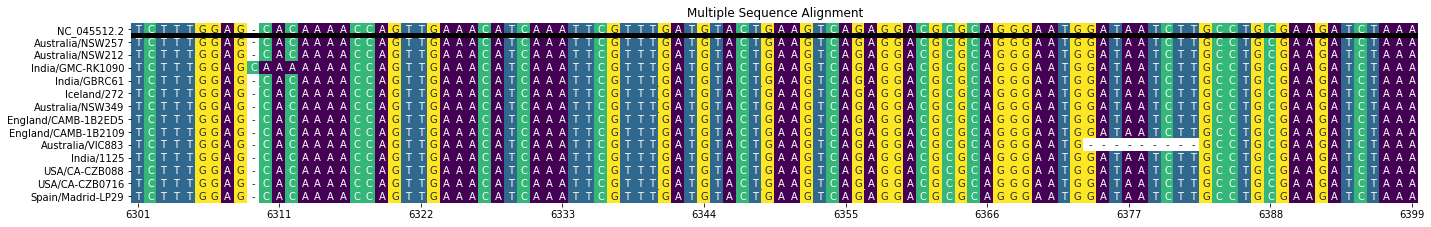

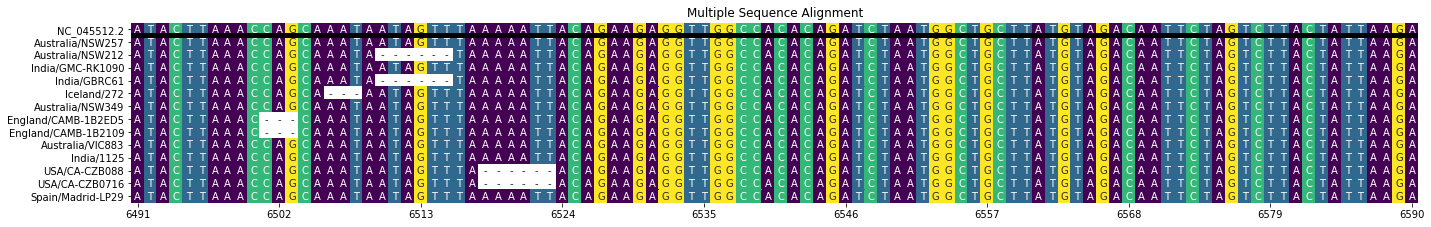

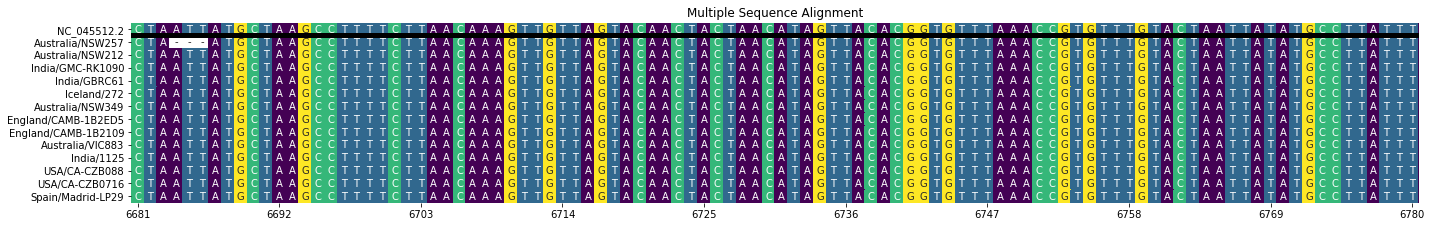

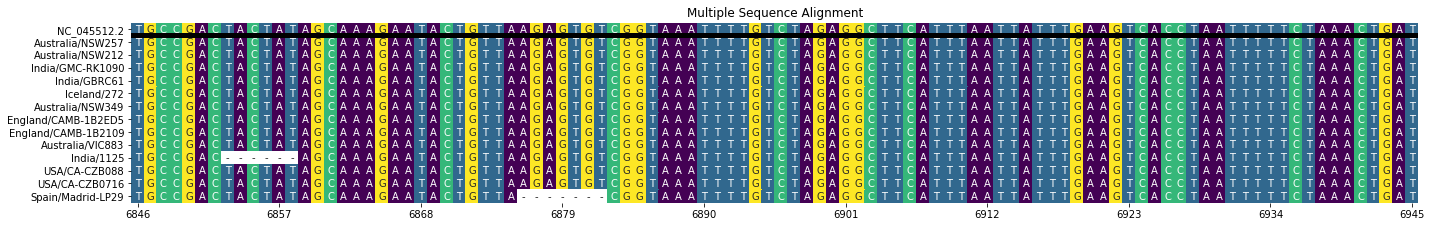

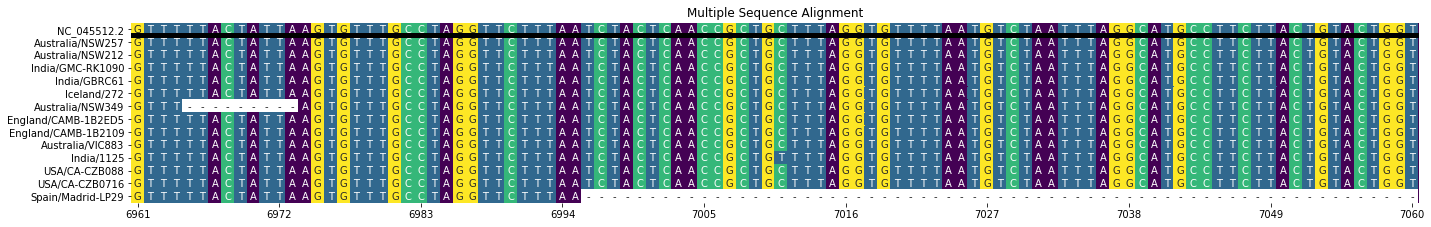

In [110]:
d = deletions[(deletions['Start Pos']>6300) & (deletions['Start Pos']<7000)]
sv_regions = [6300, 6490,6680, 6845,6960]
samples = np.concatenate([np.array(dd['Possible Samples'].split(', '))[:MAX_SEQS_PER_VARIANT] for dd in d.iloc])
samples = [s for s in samples if s!='Saudi']
alignment_filt = [a for a in alignment if a.id.split('|')[1].replace('hCoV-19/', '').replace('/2020', '') in samples]
for START  in sv_regions:
    from_ = rev_ref_dict[START]
    to_ = rev_ref_dict[START]+100
    PlotMSA(alignment_filt, from_, to_, ref_seq, ref_dict, title='Multiple Sequence Alignment',
            fig_file=MSA_FILEPATH + '/%i_%i_bp.svg' % (START, START+50))

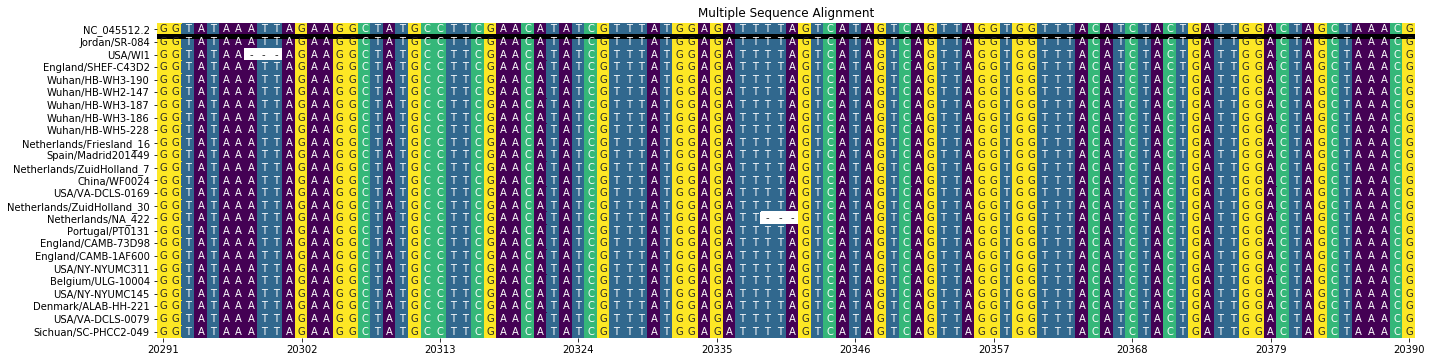

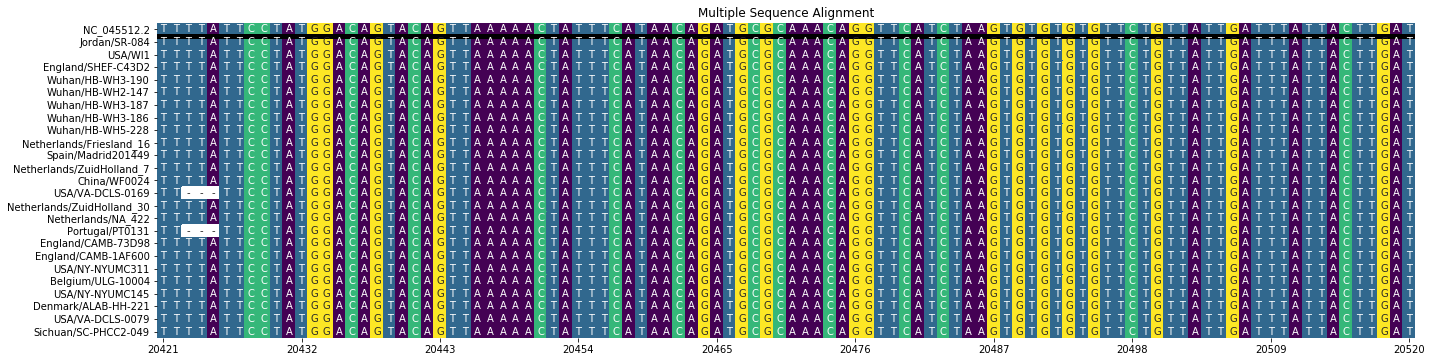

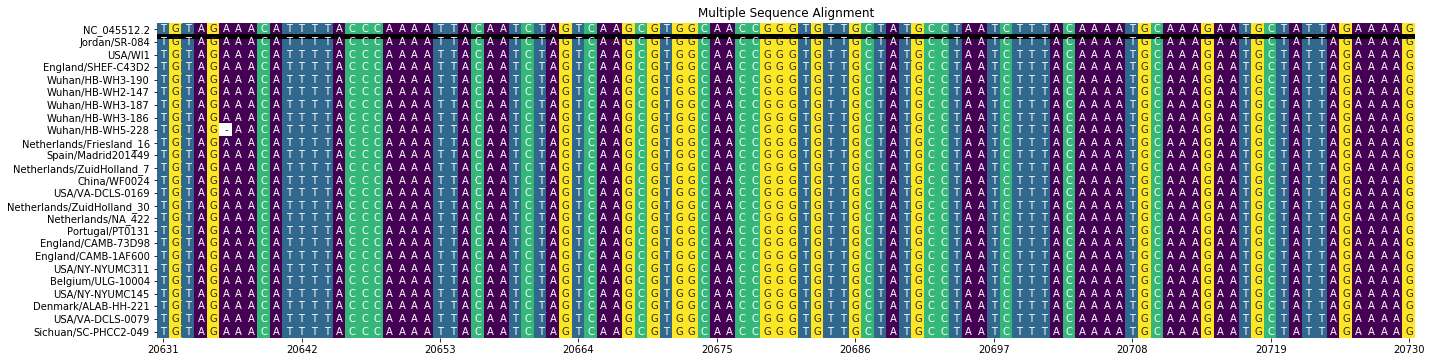

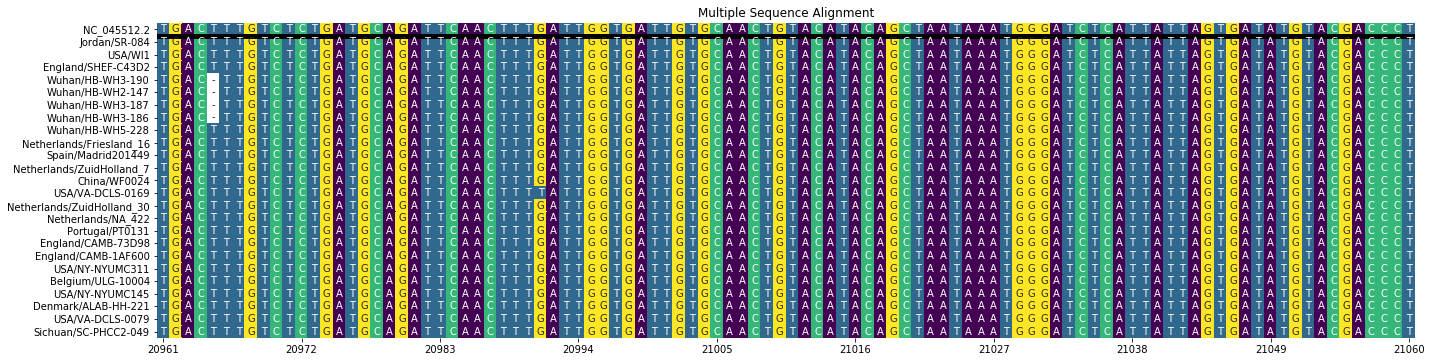

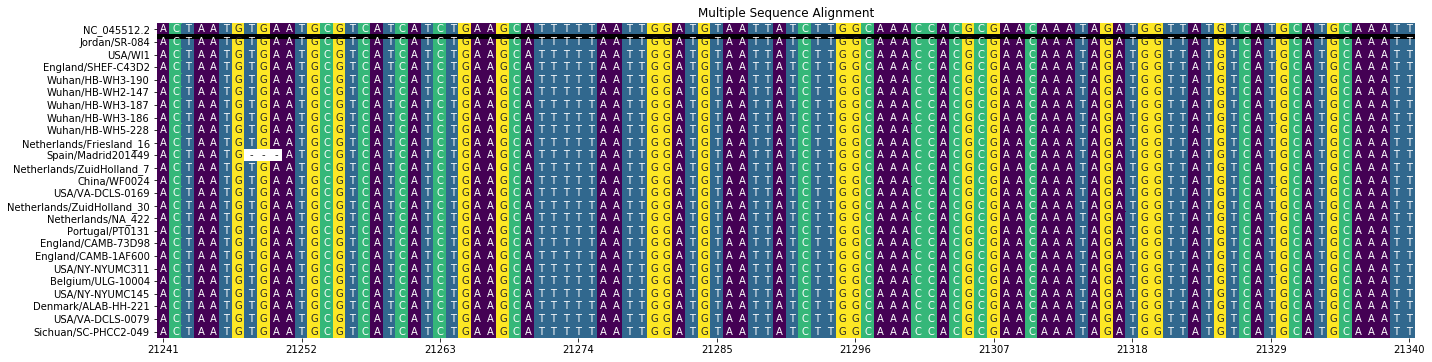

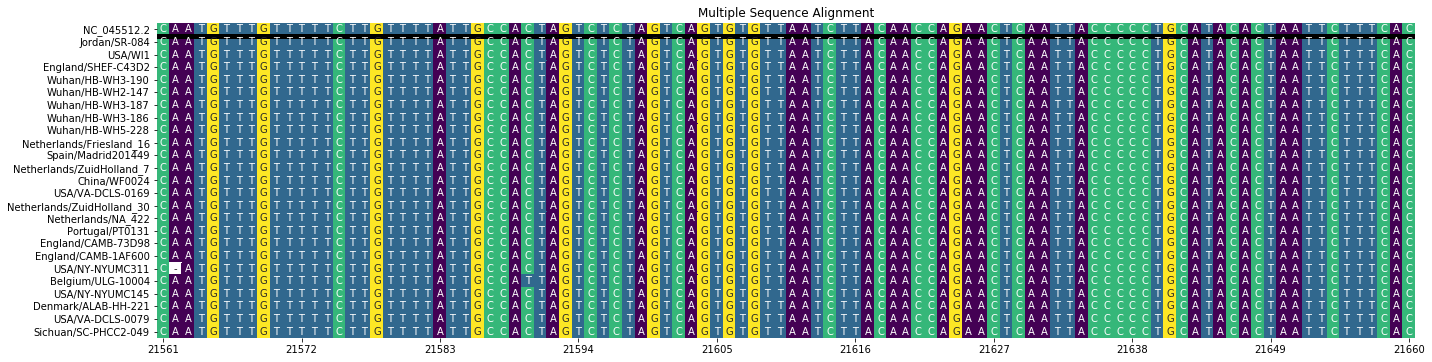

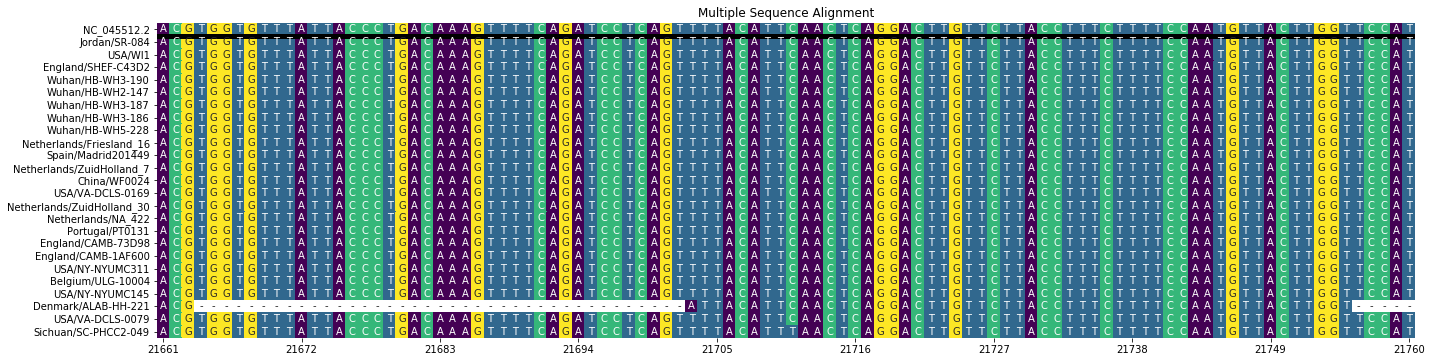

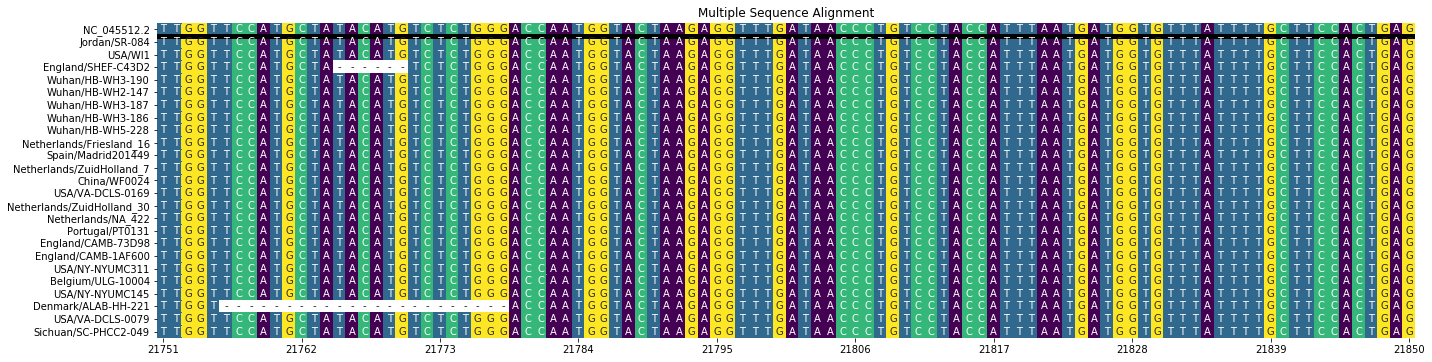

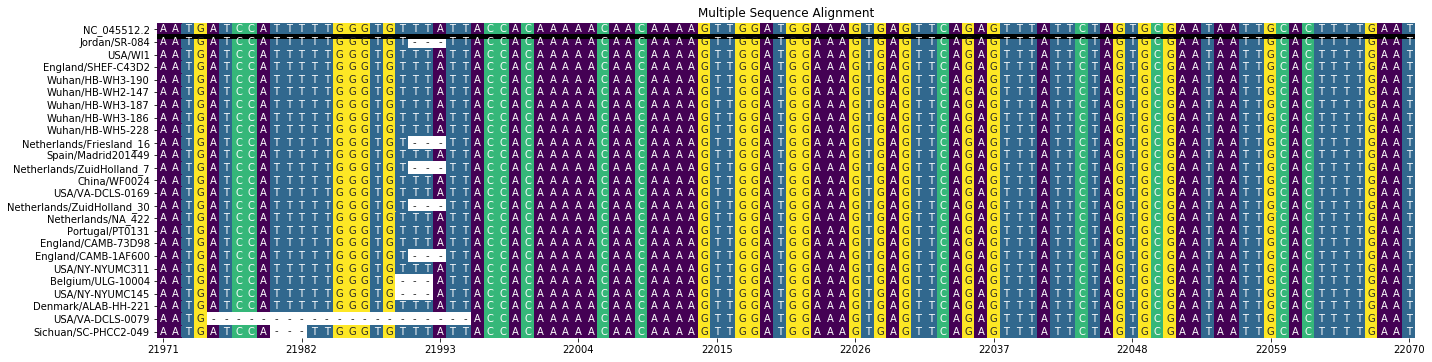

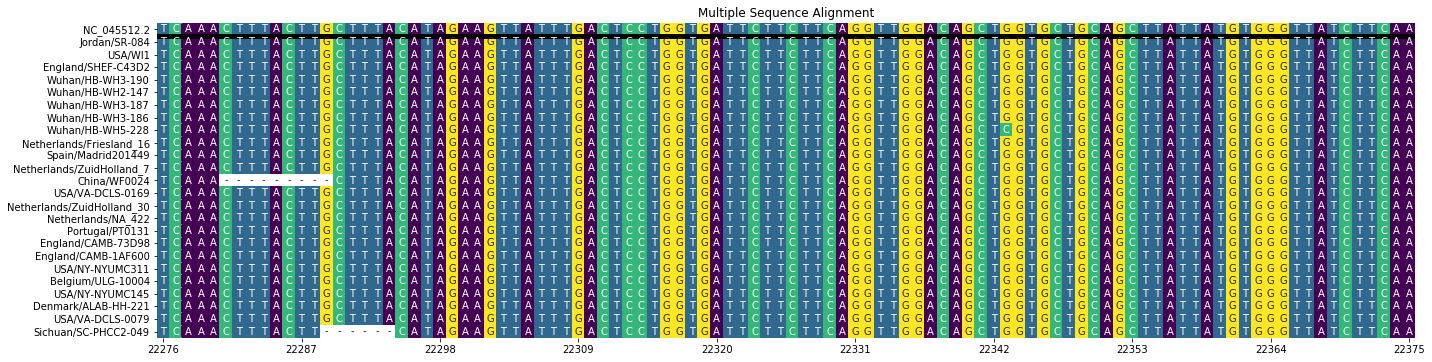

In [74]:
MAX_SEQS_PER_VARIANT=5
d = deletions[(deletions['Start Pos']>20000) & (deletions['Start Pos']<23000)]
sv_regions = [20290,20420,20630,20960,21240,21560,21660,21750,21970,22275]
samples = np.concatenate([np.array(dd['Possible Samples'].split(', '))[:MAX_SEQS_PER_VARIANT] for dd in d.iloc])
samples = [s for s in samples if s!='Saudi']
alignment_filt = [a for a in alignment if a.id.split('|')[1].replace('hCoV-19/', '').replace('/2020', '') in samples]
for START  in sv_regions:
    from_ = rev_ref_dict[START]
    to_ = rev_ref_dict[START]+100
    PlotMSA(alignment_filt, from_, to_, ref_seq, ref_dict, title='Multiple Sequence Alignment',
            fig_file=MSA_FILEPATH + '/%i_%i_bp.svg' % (START, START+50))

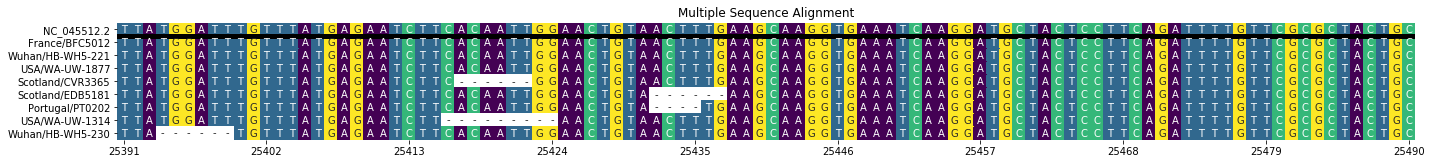

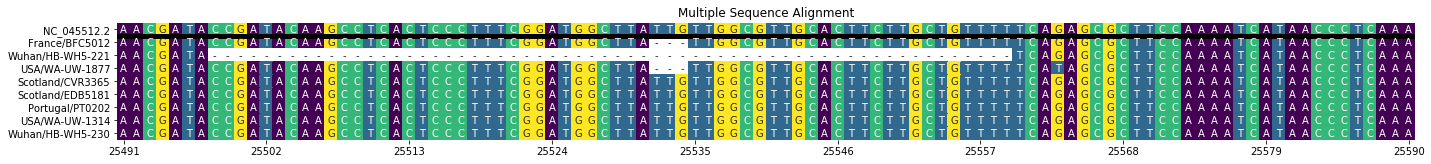

In [111]:
d = deletions[(deletions['Start Pos']>25390) & (deletions['Start Pos']<25590)]
sv_regions = [25390,25490]
samples = np.concatenate([np.array(dd['Possible Samples'].split(', '))[:MAX_SEQS_PER_VARIANT] for dd in d.iloc])
samples = [s for s in samples if s!='Saudi']
alignment_filt = [a for a in alignment if a.id.split('|')[1].replace('hCoV-19/', '').replace('/2020', '') in samples]
for START  in sv_regions:
    from_ = rev_ref_dict[START]
    to_ = rev_ref_dict[START]+100
    PlotMSA(alignment_filt, from_, to_, ref_seq, ref_dict, title='Multiple Sequence Alignment',
            fig_file=MSA_FILEPATH + '/%i_%i_bp.svg' % (START, START+50))

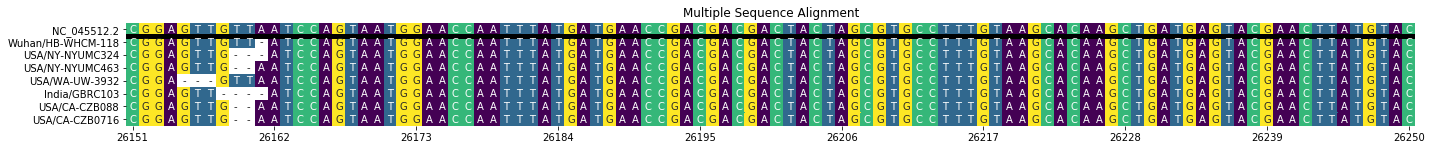

In [108]:
d = deletions[(deletions['Start Pos']>26150) & (deletions['Start Pos']<26160)]
sv_regions = [26150]
samples = np.concatenate([np.array(dd['Possible Samples'].split(', '))[:MAX_SEQS_PER_VARIANT] for dd in d.iloc])
samples = [s for s in samples if s!='Saudi']
alignment_filt = [a for a in alignment if a.id.split('|')[1].replace('hCoV-19/', '').replace('/2020', '') in samples]
for START  in sv_regions:
    from_ = rev_ref_dict[START]
    to_ = rev_ref_dict[START]+100
    PlotMSA(alignment_filt, from_, to_, ref_seq, ref_dict, title='Multiple Sequence Alignment',
            fig_file=MSA_FILEPATH + '/%i_%i_bp.svg' % (START, START+50))

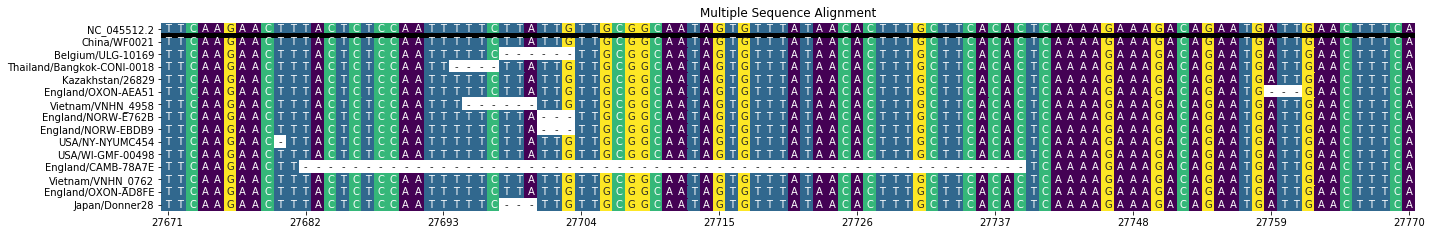

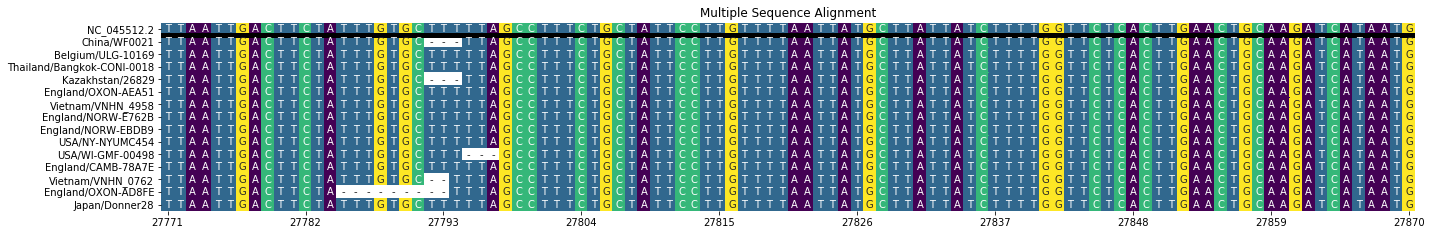

In [102]:
d = deletions[(deletions['Start Pos']>27660) & (deletions['Start Pos']<27800)]
sv_regions = [27670, 27770]
samples = np.concatenate([np.array(dd['Possible Samples'].split(', '))[:MAX_SEQS_PER_VARIANT] for dd in d.iloc])
samples = [s for s in samples if s!='Saudi']
alignment_filt = [a for a in alignment if a.id.split('|')[1].replace('hCoV-19/', '').replace('/2020', '') in samples]
for START  in sv_regions:
    from_ = rev_ref_dict[START]
    to_ = rev_ref_dict[START]+100
    PlotMSA(alignment_filt, from_, to_, ref_seq, ref_dict, title='Multiple Sequence Alignment',
            fig_file=MSA_FILEPATH + '/%i_%i_bp.svg' % (START, START+50))